<a href="https://colab.research.google.com/github/Abinayak03/Unsupervised-learning/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import necessary library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Import the dataset***

In [ ]:
df = pd.read_excel("income.xlsx", names=['name','age','income'])
df.head()

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87


<Axes: xlabel='age', ylabel='income'>

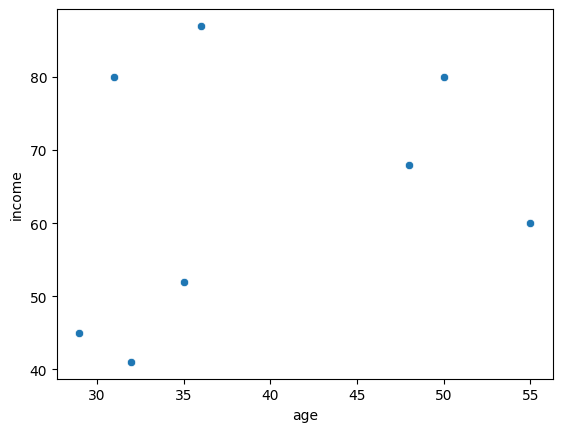

In [ ]:
sns.scatterplot(df,x='age',y='income')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=3,linkage='average')

hc.fit(df[['age','income']])
hc.labels_

array([1, 0, 1, 1, 2, 0, 2, 0])

In [ ]:
df['cluster'] = hc.labels_
df.head()

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2


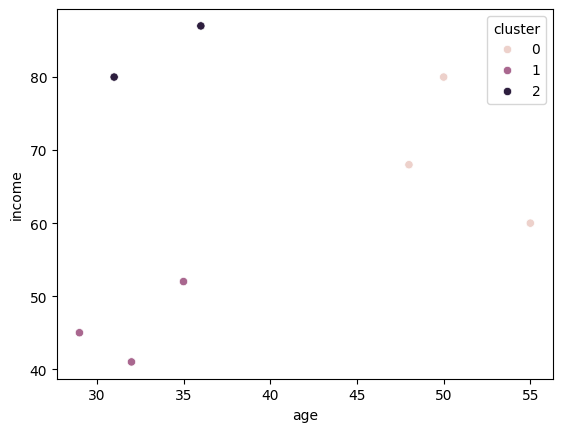

In [ ]:
sns.scatterplot(df,x='age',y='income',hue='cluster')
plt.show()

***Visualize clusters using scipy library***

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage, fcluster

In [ ]:
X=df[['age','income']]
z=linkage(X,method='average')
z


#first and secondcolumn indicates the index of names
#third column indicates the euclidean distance
#fourth column indicates the number of points in the cluster




array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

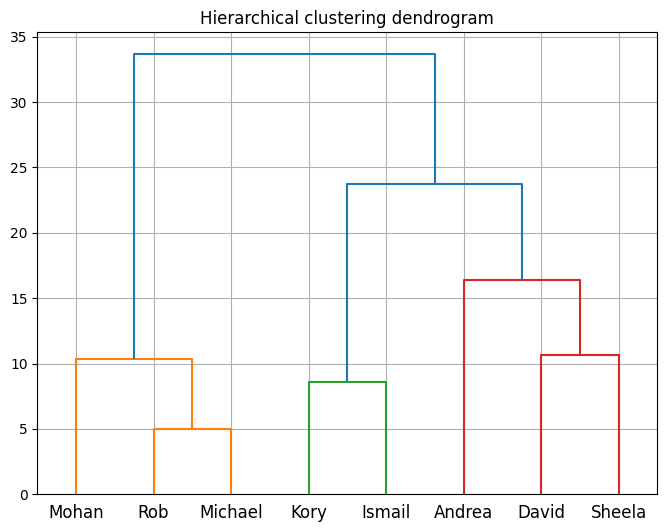

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Hierarchical clustering dendrogram')
dendrogram(z, labels=df['name'].values)
plt.grid()
plt.show()

In [ ]:
clusters = fcluster(z, t = 3, criterion='maxclust')
clusters

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [ ]:
df['cluster'] = clusters
df.head()

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,3
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2


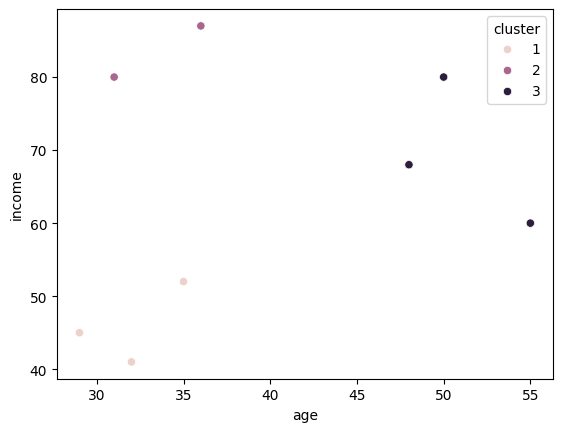

In [ ]:
sns.scatterplot(df,x='age',y='income',hue='cluster')
plt.show()